In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_json('../data/sample_small.json', lines=True)

In [3]:
df.head()

,ts,visitor_uuid,visitor_source,visitor_device,visitor_useragent,visitor_ip,visitor_country,visitor_referrer,env_type,env_doc_id,event_type,subject_type,subject_doc_id,subject_page,cause_type,event_readtime,env_ranking,env_build,env_name,env_component,visitor_username,event_index,subject_infoboxid,subject_url,cause_position,cause_adid,env_adid,cause_embedid
0,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,0.0,impression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,1.0,page,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,2.0,NaN,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,3.0,NaN,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393631983,232eeca785873d35,internal,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,fcf9c67037f993f0,MX,63765fcd2ff864fd,stream,NaN,impression,doc,100713205147-2ee05a98f1794324952eea5ca678c026,1.0,NaN,NaN,10.0,1.7.118-b946,explore,editors_picks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_count = df[['visitor_uuid','visitor_country','env_doc_id']]
df_count.head()

,visitor_uuid,visitor_country,env_doc_id
0,04daa9ed9dde73d3,ES,140224195414-e5a9acedd5eb6631bb6b39422fba6798
1,04daa9ed9dde73d3,ES,140224195414-e5a9acedd5eb6631bb6b39422fba6798
2,ade7e1f63bc83c66,BR,140222143932-91796b01f94327ee809bd759fd0f6c76
3,ade7e1f63bc83c66,BR,140222143932-91796b01f94327ee809bd759fd0f6c76
4,232eeca785873d35,MX,NaN


In [5]:
df_count = df_count.loc[df_count['env_doc_id'] == "140222143932-91796b01f94327ee809bd759fd0f6c76"]

In [6]:
df_count['visitor_uuid'] = df_count['visitor_uuid'].drop_duplicates()

In [7]:
df_count = df_count[['visitor_uuid','visitor_country']]

In [8]:
df_count_gp = df_count.groupby(by='visitor_country').count().sort_values(by='visitor_uuid', ascending=False).reset_index()

In [9]:
df_count_gp.head(10)

,visitor_country,visitor_uuid
0,BR,1


<AxesSubplot: xlabel='visitor_country'>

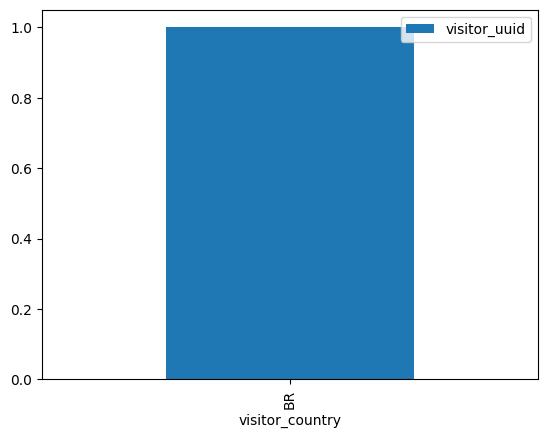

In [10]:
df_count_gp.plot(kind='bar', x='visitor_country')

c:\Users\abdelsalam\OneDrive - Emicool\Documents\HW\SC\analyticsapp\.venv\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


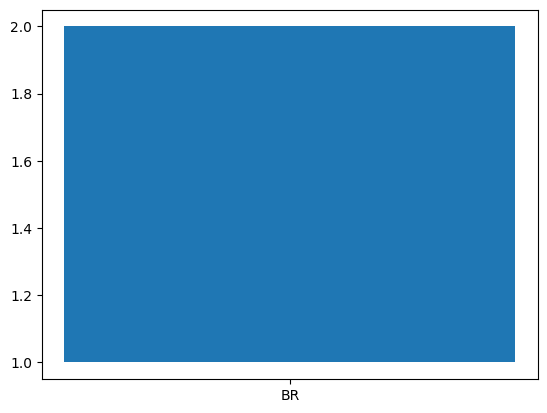

In [17]:
fig, ax = plt.subplots()
ax.bar(x=df_count_gp['visitor_country'], y=df_count_gp['visitor_uuid'], height=1)
plt.show()